<a href="https://colab.research.google.com/github/ktuzova/ml_mai/blob/main/ml2demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Лабораторная работа 2

Выполнила: Тузова Ксения М8O-309Б-22

In [ ]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 9.3 MB/s eta 0:00:00


In [49]:
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import lightgbm as lgb
import xgboost as xgb
import catboost
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from lightgbm import LGBMClassifier
import xgboost as xgb
from catboost import CatBoostClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
from sklearn.base import BaseEstimator
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [39]:
# Загрузка данных
train_data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")

# Первичный анализ данных
train_data.info()  # Проверка типов данных и пропусков
train_data.describe()  # Статистический обзор числовых признаков

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11017 entries, 0 to 11016
Data columns (total 36 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ApplicationDate             10487 non-null  object 
 1   Age                         10487 non-null  float64
 2   AnnualIncome                10487 non-null  float64
 3   CreditScore                 9986 non-null   float64
 4   LoanAmount                  9986 non-null   float64
 5   LoanDuration                10487 non-null  float64
 6   MaritalStatus               10487 non-null  object 
 7   NumberOfDependents          10487 non-null  float64
 8   HomeOwnershipStatus         10487 non-null  object 
 9   MonthlyDebtPayments         9986 non-null   float64
 10  CreditCardUtilizationRate   10487 non-null  float64
 11  NumberOfOpenCreditLines     10487 non-null  float64
 12  NumberOfCreditInquiries     10487 non-null  float64
 13  DebtToIncomeRatio           104

,Age,AnnualIncome,CreditScore,LoanAmount,LoanDuration,NumberOfDependents,MonthlyDebtPayments,CreditCardUtilizationRate,NumberOfOpenCreditLines,NumberOfCreditInquiries,...,UtilityBillsPaymentHistory,JobTenure,Experience,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,LoanApproved,RiskScore
count,10487.000000,10487.000000,9986.000000,9986.000000,10487.000000,10487.000000,9986.000000,10487.000000,10487.000000,10487.000000,...,10487.000000,10487.000000,10487.000000,9.986000e+03,9986.000000,10487.000000,10487.000000,10487.000000,10487.000000,1.048700e+04
mean,39.850386,131587.872127,678.082716,29874.218306,53.439878,1.568323,546.458642,0.284397,3.033565,0.979498,...,0.784428,4.949271,17.628302,1.542381e+05,0.200392,0.200112,1075.622426,0.517577,0.511776,-2.569878e+04
std,11.614132,115791.941909,175.192486,27705.509722,24.493562,1.418684,501.981888,0.159240,1.740186,0.990927,...,0.123039,2.201100,11.337248,4.622229e+05,0.094388,0.096458,1344.053181,0.894637,0.499885,1.431675e+06
min,18.000000,15000.000000,300.000000,1063.000000,12.000000,0.000000,13.000000,0.003674,0.000000,0.000000,...,0.259301,0.000000,0.000000,1.004000e+03,0.052494,0.046445,30.008506,0.006064,0.000000,-9.999999e+06
25%,32.000000,20959.500000,550.000000,12658.000000,36.000000,0.000000,233.250000,0.158929,2.000000,0.000000,...,0.708475,3.000000,9.000000,7.252500e+03,0.119908,0.119548,375.872620,0.066734,0.000000,3.256475e+01
50%,40.000000,89015.000000,722.500000,21828.500000,48.000000,1.000000,398.000000,0.262229,3.000000,1.000000,...,0.803692,5.000000,17.000000,2.742950e+04,0.182023,0.180710,684.878529,0.178193,1.000000,4.411876e+01
75%,48.000000,257025.000000,850.000000,37158.000000,60.000000,3.000000,685.000000,0.391683,4.000000,2.000000,...,0.879312,6.000000,26.000000,1.241758e+05,0.264709,0.264880,1279.930203,0.637457,1.000000,6.535690e+01
max,80.000000,748508.000000,850.000000,418997.000000,120.000000,6.000000,10879.000000,0.914635,12.000000,6.000000,...,0.996573,17.000000,57.000000,1.126117e+07,0.722497,0.833647,29634.807816,24.383046,1.000000,1.000000e+07



Распределение целевой переменной LoanApproved:
LoanApproved
1.0    5367
0.0    5120
Name: count, dtype: int64


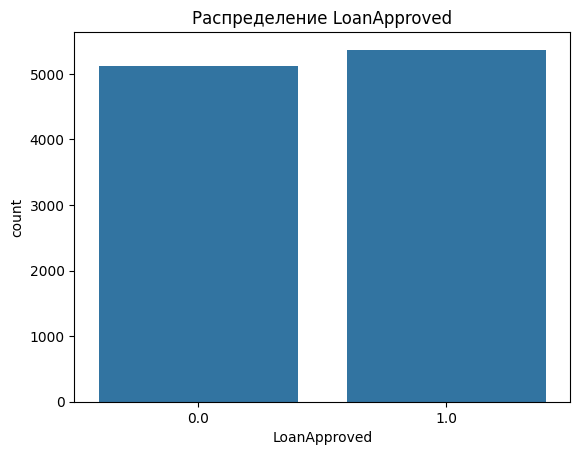

In [40]:
# Статистика по целевой переменной
print("\nРаспределение целевой переменной LoanApproved:")
print(train_data['LoanApproved'].value_counts())
sns.countplot(x='LoanApproved', data=train_data)
plt.title('Распределение LoanApproved')
plt.show()

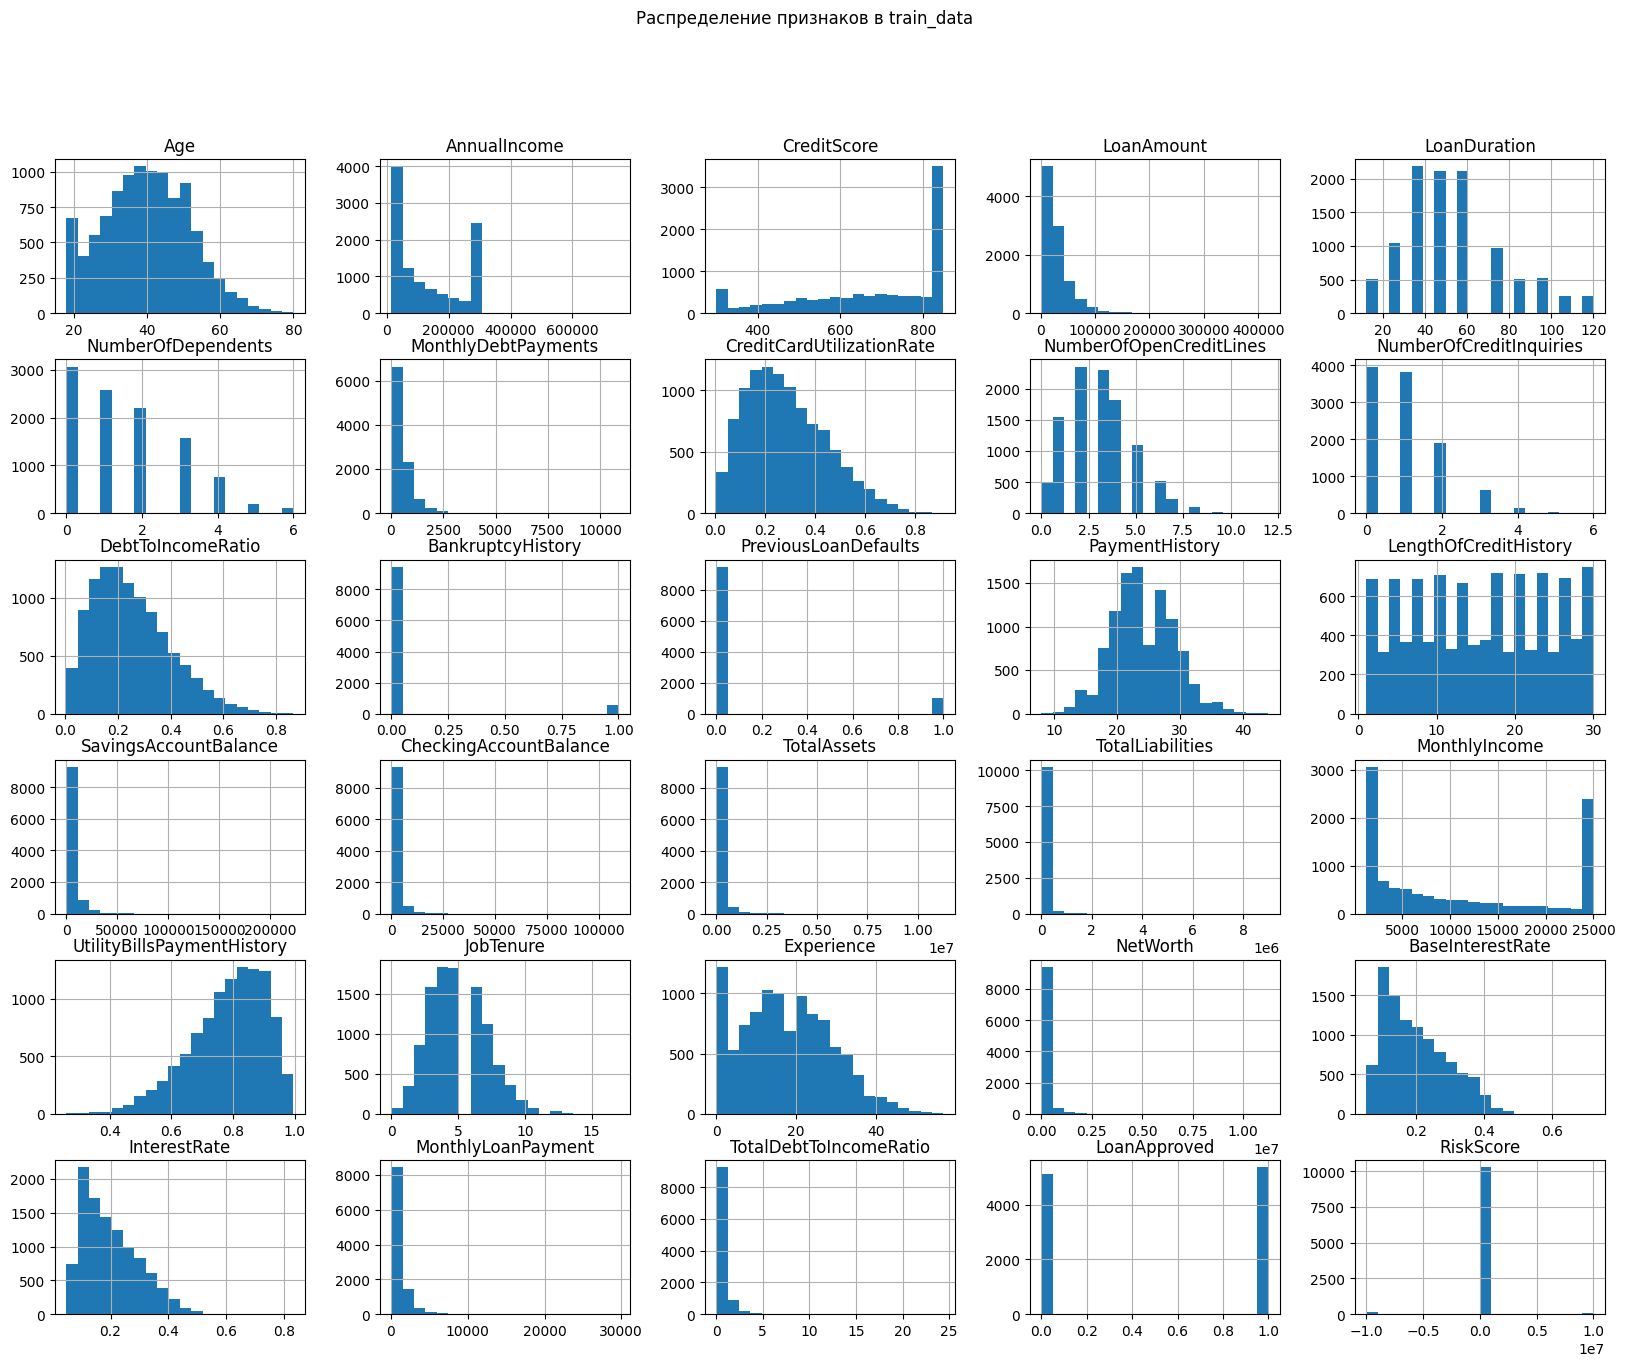

In [41]:
#Визуализация распределения значений в данных
train_data.hist(bins=20, figsize=(20, 15))
plt.suptitle('Распределение признаков в train_data')
plt.show()

In [42]:
# Заполнение пропусков для числовых признаков
numeric_columns = train_data.select_dtypes(include=['float64']).columns
train_data[numeric_columns] = train_data[numeric_columns].fillna(train_data[numeric_columns].median())

# Заполнение пропусков для категориальных признаков
categorical_columns = train_data.select_dtypes(include=['object']).columns
for col in categorical_columns:
    train_data[col] = train_data[col].fillna(train_data[col].mode()[0])

In [50]:
# Преобразование категориальных признаков с помощью
label_encoder = LabelEncoder()
for col in categorical_columns:
    train_data[col] = label_encoder.fit_transform(train_data[col])

In [51]:
# Разделение данных на обучающую и тестовую выборки
X = train_data.drop(columns=['LoanApproved'])
y = train_data['LoanApproved']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [52]:
# Стандартизация данных
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Класс MyLinearClassifier

In [53]:
class MyLinearClassifier(BaseEstimator):
    def __init__(self, learning_rate=0.01, epochs=1000):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0
        for _ in range(self.epochs):
            model = np.dot(X, self.weights) + self.bias
            predictions = self.sigmoid(model)
            dw = (1/n_samples) * np.dot(X.T, (predictions - y))
            db = (1/n_samples) * np.sum(predictions - y)
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

    def predict(self, X):
        model = np.dot(X, self.weights) + self.bias
        predictions = self.sigmoid(model)
        return [1 if p > 0.5 else 0 for p in predictions]

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

# Применение модели:
model = MyLinearClassifier()
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)


In [47]:
# Логистическая регрессия
log_reg = LogisticRegression()
log_reg.fit(X_train_scaled, y_train)
y_pred_log_reg = log_reg.predict(X_test_scaled)

# SVM
svm = SVC()
svm.fit(X_train_scaled, y_train)
y_pred_svm = svm.predict(X_test_scaled)

# Решающее дерево
tree = DecisionTreeClassifier()
tree.fit(X_train_scaled, y_train)
y_pred_tree = tree.predict(X_test_scaled)

# Случайный лес
rf = RandomForestClassifier()
rf.fit(X_train_scaled, y_train)
y_pred_rf = rf.predict(X_test_scaled)

# Градиентный бустинг
gb = GradientBoostingClassifier()
gb.fit(X_train_scaled, y_train)
y_pred_gb = gb.predict(X_test_scaled)

# LightGBM
lgb = LGBMClassifier()
lgb.fit(X_train_scaled, y_train)
y_pred_lgb = lgb.predict(X_test_scaled)

# XGBoost
xgb_model = xgb.XGBClassifier()
xgb_model.fit(X_train_scaled, y_train)
y_pred_xgb = xgb_model.predict(X_test_scaled)

# CatBoost
catboost_model = CatBoostClassifier(silent=True)
catboost_model.fit(X_train_scaled, y_train)
y_pred_catboost = catboost_model.predict(X_test_scaled)


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 4710, number of negative: 4103
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002165 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5092
[LightGBM] [Info] Number of data points in the train set: 8813, number of used features: 35
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.534438 -> initscore=0.137969
[LightGBM] [Info] Start training from score 0.137969


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Визуализация

MyLinearClassifier Metrics:
Accuracy: 0.9074410163339383
Precision: 0.9147679324894514
Recall: 0.9132266217354675
F1-Score: 0.9139966273187183


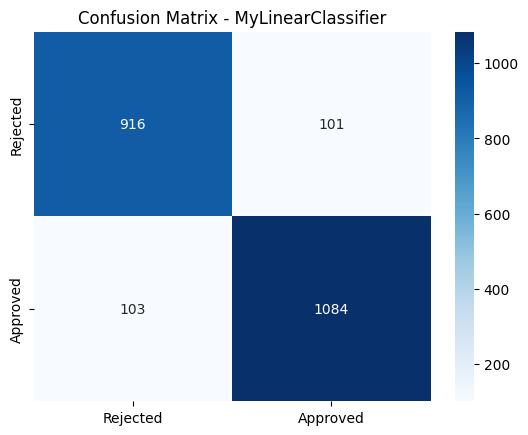

Logistic Regression Metrics:
Accuracy: 0.9301270417422868
Precision: 0.9388275276125744
Recall: 0.9309182813816343
F1-Score: 0.9348561759729273


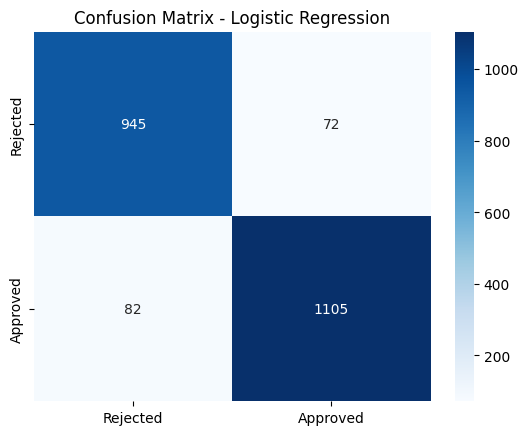

SVM Metrics:
Accuracy: 0.9219600725952813
Precision: 0.947136563876652
Recall: 0.9056444818871103
F1-Score: 0.9259259259259259


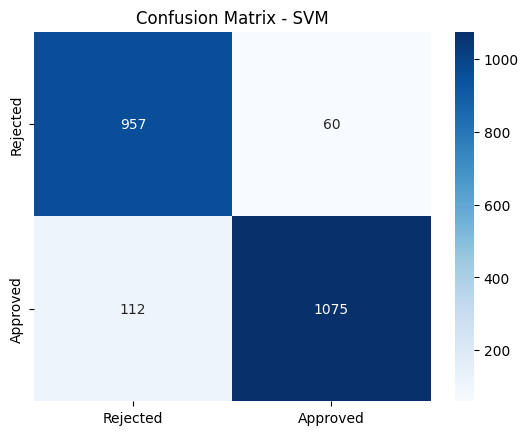

Decision Tree Metrics:
Accuracy: 0.9804900181488203
Precision: 0.9814814814814815
Recall: 0.9823083403538332
F1-Score: 0.9818947368421053


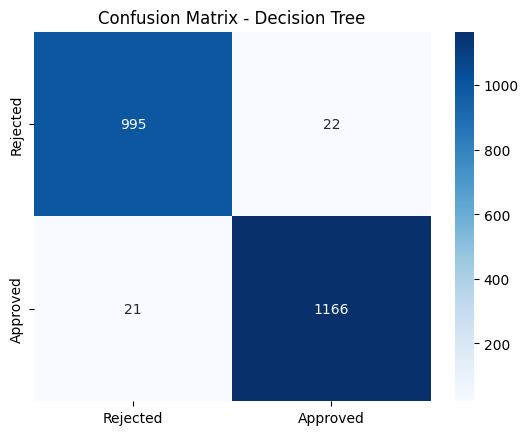

Random Forest Metrics:
Accuracy: 0.9818511796733213
Precision: 0.9815281276238456
Recall: 0.9848357203032856
F1-Score: 0.9831791421362489


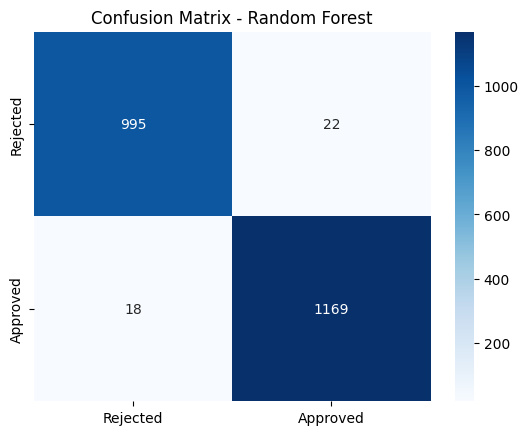

Gradient Boosting Metrics:
Accuracy: 0.98502722323049
Precision: 0.9865092748735245
Recall: 0.9856781802864364
F1-Score: 0.9860935524652339


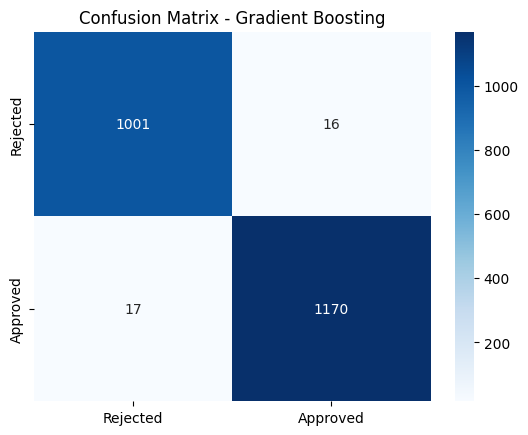

LightGBM Metrics:
Accuracy: 0.9918330308529946
Precision: 0.9932489451476794
Recall: 0.991575400168492
F1-Score: 0.9924114671163575


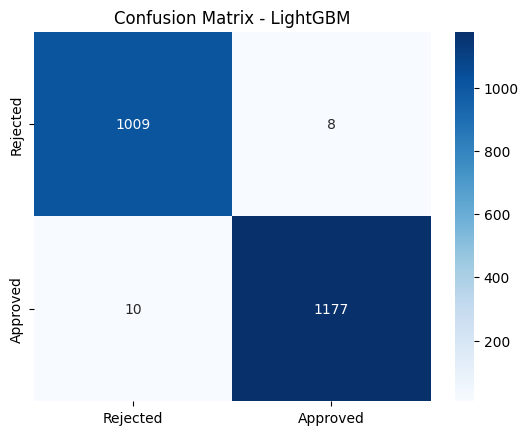

XGBoost Metrics:
Accuracy: 0.9900181488203267
Precision: 0.9932260795935648
Recall: 0.9882055602358888
F1-Score: 0.9907094594594594


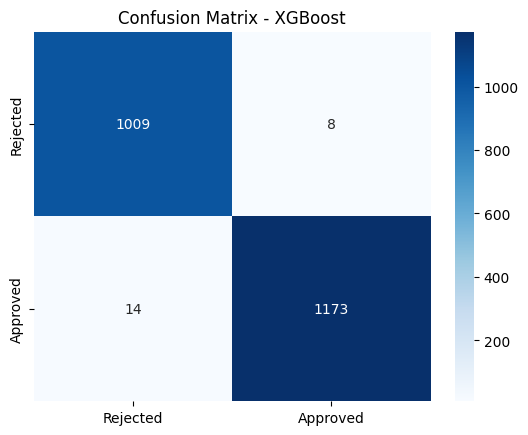

CatBoost Metrics:
Accuracy: 0.9922867513611615
Precision: 0.9940878378378378
Recall: 0.991575400168492
F1-Score: 0.9928300295234078


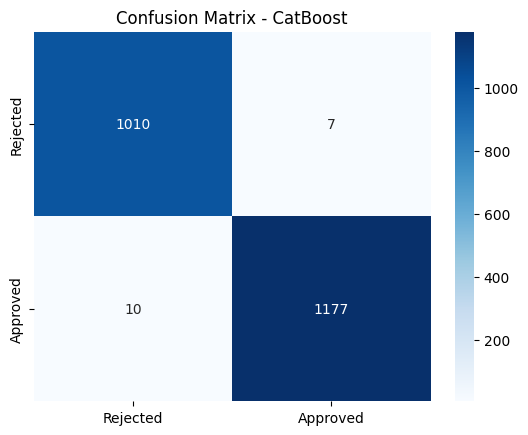

In [54]:
def print_metrics(y_true, y_pred, model_name):
    print(f"{model_name} Metrics:")
    print(f"Accuracy: {accuracy_score(y_true, y_pred)}")
    print(f"Precision: {precision_score(y_true, y_pred)}")
    print(f"Recall: {recall_score(y_true, y_pred)}")
    print(f"F1-Score: {f1_score(y_true, y_pred)}")
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Rejected", "Approved"], yticklabels=["Rejected", "Approved"])
    plt.title(f"Confusion Matrix - {model_name}")
    plt.show()

# Вывод метрик и confusion matrix для всех моделей
models = [
    ("MyLinearClassifier", y_pred),
    ("Logistic Regression", y_pred_log_reg),
    ("SVM", y_pred_svm),
    ("Decision Tree", y_pred_tree),
    ("Random Forest", y_pred_rf),
    ("Gradient Boosting", y_pred_gb),
    ("LightGBM", y_pred_lgb),
    ("XGBoost", y_pred_xgb),
    ("CatBoost", y_pred_catboost)
]

for model_name, y_pred_model in models:
    print_metrics(y_test, y_pred_model, model_name)


По результатам анализа метрик всех моделей можно сделать следующие выводы:

Логистическая регрессия и SVM показали хорошие результаты, с высокими значениями precision и recall, однако их показатели несколько ниже, чем у более сложных моделей. Это указывает на то, что они могут не учитывать более сложные зависимости в данных, которые могут быть важны для более точной классификации.

Дерево решений и случайный лес показали впечатляющие результаты с очень высоким значением точности и полноты, что говорит о том, что эти методы могут хорошо захватывать нелинейные зависимости. Однако, среди этих моделей случайный лес показал слегка лучшие результаты, особенно в отношении F1-Score.

Градиентный бустинг (Gradient Boosting) тоже продемонстрировал высокий уровень эффективности. Эта модель хорошо работает при работе с комплексными и высокоразмерными данными, так как она может эффективно снижать ошибку за счет комбинации слабых моделей.

LightGBM и XGBoost показали лучшие результаты среди всех моделей. Эти методы ансамблевого обучения часто используют оптимизацию и позволяют получать очень высокие значения точности и полноты, что делает их идеальными для решения задач с большим количеством признаков и наблюдений.

CatBoost, как и LightGBM и XGBoost, также продемонстрировал отличные результаты, с высокими значениями precision, recall и F1-Score. Это метод, который оптимизирован для работы с категориальными признаками и может быть полезен, если такие признаки играют важную роль в задаче.

Наиболее информативной метрикой в данной задаче является Recall. Это важно, поскольку наша задача — правильно классифицировать тех заявителей, которым стоит одобрить кредит. Высокий recall минимизирует вероятность отклонения кредитов, которые могут быть ошибочно отклонены, что критично для финансовых решений.

Наибольшее внимание стоит уделить LightGBM, XGBoost и CatBoost, так как эти модели продемонстрировали наибольшую точность, полноту и F1-меру, что делает их наилучшими кандидатами для данной задачи классификации. Эти модели обеспечивают отличный баланс между высокой точностью и полнотой, что важно для бизнеса.

В заключение, для данной задачи наилучший результат был получен с использованием моделей LightGBM и CatBoost, которые показали высокую эффективность при обработке сложных данных с большим количеством признаков.